In [43]:
import numpy as np
import matplotlib.pyplot as plt
import math

# stały przedział [-5, 5]

def f(x):
    return 1 / (1 + x**2)
        
def xMatrixBuilder(arr):
    matrix = []
    for i in range(len(arr)):
        row = []
        for j in range(len(arr)):
            row.append(arr[i]**j)
        matrix.append(row)
         
    return matrix

def yVectorBuilder(arr):
    vector = []
    for val in arr:
        vector.append([val])
        
    return vector

def polynomial(x, coefficientArr):
    sum = 0
    for i in range(len(coefficientArr)):
        sum += coefficientArr[i] * x**i
    
    return sum

In [44]:
args = np.linspace(-5, 5, 16) # wywołania ostatnim argumentem 6, 11, 16
values = [f(x) for x in args]

xMatrix = np.array(xMatrixBuilder(args))
Inv = np.linalg.inv(xMatrix)
yVector = np.array(yVectorBuilder(values))
    
# przepisanie wspołczynnikow do wygodniejszej postaci
coefficientArr = []
for i in range(len(Inv.dot(yVector))):
    coefficientArr.append(Inv.dot(yVector)[i][0])

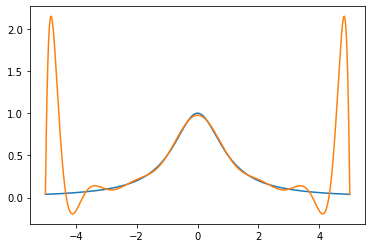

In [45]:
# Zad 1a

x = np.linspace(-5, 5, 10000)
plt.plot(x, f(x))
plt.plot(x, polynomial(x, coefficientArr))

    

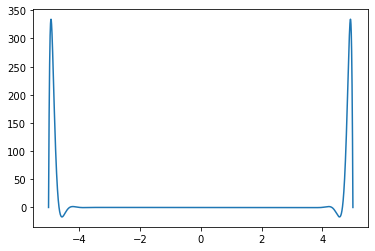

In [46]:
# Zad 1b

args = np.linspace(-5, 5, 30)
values = [f(x) for x in args]

xMatrix = np.array(xMatrixBuilder(args))
Inv = np.linalg.inv(xMatrix)
yVector = np.array(yVectorBuilder(values))
    
# przepisanie wspolczynnikow do wygodniejszej postaci
coefficientArr = []
for i in range(len(Inv.dot(yVector))):
    coefficientArr.append(Inv.dot(yVector)[i][0])
    
x = np.linspace(-5, 5, 10000)
plt.plot(x, f(x) - polynomial(x, coefficientArr))

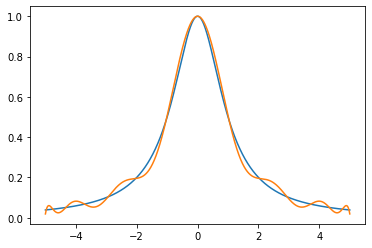

In [47]:
# Zad 2
# upraszaczam wzór na węzły przyjmując: a = -5; b = 5

n = 15
args = [5 * math.cos( (2*i - 1) / (2 * n) * math.pi ) for i in range(1, 16)]
values = [f(x) for x in args]

xMatrix = np.array(xMatrixBuilder(args))
Inv = np.linalg.inv(xMatrix)
yVector = np.array(yVectorBuilder(values))
    
# przepisanie wspołczynników do wygodniejszej postaci
coefficientArr = []
for i in range(len(Inv.dot(yVector))):
    coefficientArr.append(Inv.dot(yVector)[i][0])
    
x = np.linspace(-5, 5, 10000)
plt.plot(x, f(x))
plt.plot(x, polynomial(x, coefficientArr))

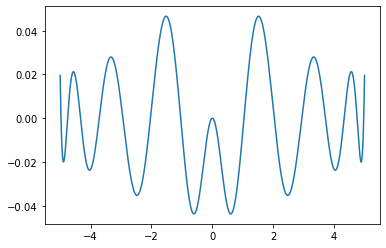

In [48]:
x = np.linspace(-5, 5, 10000)
plt.plot(x, f(x) - polynomial(x, coefficientArr))

# Błąd zmalał, ponieważ węzły są gęściej rozlokowane na krańcach przedziału, 
# dzięki czemu efekt Rungego, który tam występował jest niwelowany.

In [49]:
# Zad 3

# x = a * cos(t)
# y = b * sin(t)
n = 10
a = 5
b = 2
numOfPoints = 30

args = np.linspace(0, 2, n)
args = [math.pi * t for t in args]
values = [a * math.cos(t) for t in args]

def h(i, args):
    return args[i + 1] - args[i]

def delta(i, args, values):
    return (values[i + 1] - values[i]) / (args[i + 1] - args[i])

def d2(i, args, values):
    return ( delta(i + 1, args, values) - delta(i, args, values) ) / ( args[i + 2] - args[i] )

def d3(i, args, values):
    return ( d2(i + 1, args, values) - d2(i, args, values) ) / ( args[i + 3] - args[i] )

def cubicSpine(x, i, args, values, sigma):
    return ( sigma[i][0] * (args[i + 1] - x)**3 / h(i, args) ) + ( sigma[i + 1][0] * (x - args[i])**3 / h(i, args) ) + ( ( values[i + 1] / h(i, args) - sigma[i + 1][0] * h(i, args) ) * (x - args[i]) ) + ( ( values[i] / h(i, args) - sigma[i][0] * h(i, args) ) * (args[i + 1] - x) )

In [50]:
# x(t)

# budowa macierzy do równania macierzowego

matrix = []

# uzupełnienie pierwszego wiersza
row1 = n * [0]
row1[0] = -h(0, args)
row1[1] = h(0, args)
matrix.append(row1)

# uzupełnienie środkowych wierszy
for i in range(0, n - 2):
    row = n * [0]
    row[i] = h(i, args)
    row[i + 1] = 2 * (h(i, args) + h(i + 1, args))
    row[i + 2] = h(i + 1, args)
    matrix.append(row)
    
# uzupełnienie ostatniego wiersza
rowN = n * [0]
rowN[n - 2] = h(n - 2, args)
rowN[n - 1] = -h(n - 2, args)
matrix.append(rowN)


# budowa wektora do równania macierzowego

vector = []

# uzupełnienie pierwszego wiersza
vector.append([(h(0, args))**2 * d3(0, args, values)])

# uzupełnienie środkowych wierszy
for i in range(0, n - 2):
    vector.append([delta(i + 1, args, values) - delta(i, args, values)])

# uzupełnienie ostatniego wiersza
vector.append([-(h(n - 2, args))**2 * d3(n - 4, args, values)])
        
A = np.array(matrix)
B = np.array(vector)
sigma = np.linalg.solve(A, B)

In [51]:
points = np.linspace(0, 2, numOfPoints)
points = [math.pi * t for t in points]

In [52]:
xArray = []
ctr = 0
for i in range(len(args)):
    while points[ctr] < args[i]:
        xArray.append(cubicSpine(points[ctr], i - 1, args, values, sigma))
        ctr += 1

In [53]:
values = [b * math.sin(t) for t in args]

In [54]:
# y(t)

# budowa macierzy do równania macierzowego

matrix = []

# uzupełnienie pierwszego wiersza
row1 = n * [0]
row1[0] = -h(0, args)
row1[1] = h(0, args)
matrix.append(row1)

# uzupełnienie środkowych wierszy
for i in range(0, n - 2):
    row = n * [0]
    row[i] = h(i, args)
    row[i + 1] = 2 * (h(i, args) + h(i + 1, args))
    row[i + 2] = h(i + 1, args)
    matrix.append(row)
    
# uzupełnienie ostatniego wiersza
rowN = n * [0]
rowN[n - 2] = h(n - 2, args)
rowN[n - 1] = -h(n - 2, args)
matrix.append(rowN)


# budowa wektora do równania macierzowego

vector = []

# uzupełnienie pierwszego wiersza
vector.append([(h(0, args))**2 * d3(0, args, values)])

# uzupełnienie środkowych wierszy
for i in range(0, n - 2):
    vector.append([delta(i + 1, args, values) - delta(i, args, values)])

# uzupełnienie ostatniego wiersza
vector.append([-(h(n - 2, args))**2 * d3(n - 4, args, values)])
        
A = np.array(matrix)
B = np.array(vector)
sigma = np.linalg.solve(A, B)

In [55]:
yArray = []
ctr = 0
for i in range(len(args)):
    while points[ctr] < args[i]:
        yArray.append(cubicSpine(points[ctr], i - 1, args, values, sigma))
        ctr += 1

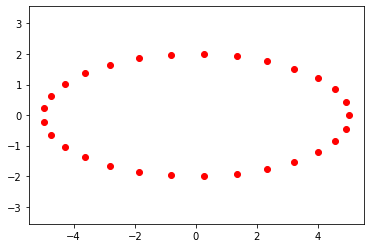

In [56]:
plt.plot(xArray, yArray, 'ro')
plt.axis('equal')
plt.show()